<a href="https://colab.research.google.com/github/codedyasai/Python_MachineLearning/blob/main/04_%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1_%ED%9A%8C%EA%B7%80(Logistic_Regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module Loading

In [ ]:
from IPython.display import display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install mglearn
import mglearn

# 음수표현 라이브러리
plt.rcParams['axes.unicode_minus'] = False

# 경고무시
import warnings
warnings.filterwarnings("ignore")

# 매직명령어 : 시각화 결과가 노트북에 포함되도록
%matplotlib inline

  Using cached mglearn-0.2.0-py2.py3-none-any.whl (581 kB)


# 데이터 셋 로딩

- data : fish.csv
- 생선을 분류하는 분류 알고리즘
- knn 최근접 이웃 분류 알고리즘과 마찬가지고 확률을 이용하여 클래스를 분류해낸다.

In [ ]:
fish = pd.read_csv('fish.csv')
fish

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


In [ ]:
# 품종의 고유값 추출
fish.Species.unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [ ]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   159 non-null    object 
 1   Weight    159 non-null    float64
 2   Length    159 non-null    float64
 3   Diagonal  159 non-null    float64
 4   Height    159 non-null    float64
 5   Width     159 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.6+ KB


## 훈련 데이터와 테스트 데이터로 분리

In [ ]:
fish.columns

Index(['Species', 'Weight', 'Length', 'Diagonal', 'Height', 'Width'], dtype='object')

In [ ]:
# features = data
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_input[:5]

array([[242.    ,  25.4   ,  30.    ,  11.52  ,   4.02  ],
       [290.    ,  26.3   ,  31.2   ,  12.48  ,   4.3056],
       [340.    ,  26.5   ,  31.1   ,  12.3778,   4.6961],
       [363.    ,  29.    ,  33.5   ,  12.73  ,   4.4555],
       [430.    ,  29.    ,  34.    ,  12.444 ,   5.134 ]])

In [ ]:
# target
fish_target = fish['Species'].to_numpy()
fish_target[:5]

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream'], dtype=object)

In [ ]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state = 42)

## 피처 스케일링

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

# k-최근접 이웃 분류기를 이용한 확률적 예측

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train_scaled, train_target)

print(knn.score(train_scaled, train_target))
print(knn.score(test_scaled, test_target))

0.8907563025210085
0.85


- 분류할 클래스가 2개 이상이면 다중분류라고 부른다.
- 다중분류에서도 타깃값을 숫자로(정형화) 바꾸어 입력할 수 있지만 사이킷런은 문자열을 그대로 사용해도 가능하다.
- 주의할점은 타깃값에 해당하는 문자열을 넘겨주면 알파벳순으로 바꿔서 처리한다는 것만 주의하면된다.

In [ ]:
# 분류할 클래스객체를 추출
knn.classes_

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [ ]:
# 예측
knn.predict(test_scaled[:5])

array(['Perch', 'Smelt', 'Pike', 'Perch', 'Perch'], dtype=object)

In [ ]:
test_scaled[:5]

array([[-0.88741352, -0.91804565, -1.03098914, -0.90464451, -0.80762518],
       [-1.06924656, -1.50842035, -1.54345461, -1.58849582, -1.93803151],
       [-0.54401367,  0.35641402,  0.30663259, -0.8135697 , -0.65388895],
       [-0.34698097, -0.23396068, -0.22320459, -0.11905019, -0.12233464],
       [-0.68475132, -0.51509149, -0.58801052, -0.8998784 , -0.50124996]])

In [ ]:
# predict_proba() : 클래스별 확률값을 반환해주는 메서드
proba = knn.predict_proba(test_scaled[:5])

# decimals : 소숫점 자리수 지정
np.round(proba, decimals = 4)

array([[0.    , 0.    , 1.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 1.    , 0.    ],
       [0.    , 0.    , 0.    , 1.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.6667, 0.    , 0.3333, 0.    , 0.    ],
       [0.    , 0.    , 0.6667, 0.    , 0.3333, 0.    , 0.    ]])

- ['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish']

In [ ]:
distances, indexs = knn.kneighbors(test_scaled[3:4])
train_target[indexs]

array([['Roach', 'Perch', 'Perch']], dtype=object)

# 로지스틱 회귀

- 대표적인 분류 알고리즘
- 인공신경망(딥러닝)에 기본이 되는 알고리즘
- 선형회귀와 비슷하게 선형 방정식을 학습하는 알고리즘
$z = a * (weight) + b * (length) + c * (Diagonal) + d * (Height) + e * (width) + f(절편)$
- a, b, c, d, e는 계수 또는 가중치라는 표현
- 시그모이드 함수(or 로지스틱 함수)

## 로지스틱 회귀(이진 분류)

In [ ]:
arr = np.array(['A', 'B','C','D','E'])
# boolean indexing
boolean = [True, False, True, False, False]
arr[boolean]

array(['A', 'C'], dtype='<U1')

In [ ]:
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [ ]:
print(train_input.shape, train_target.shape)

(119, 5) (119,)


In [ ]:
print(test_input.shape, test_target.shape)

(40, 5) (40,)


In [ ]:
# Bream, Smelt 두 개의 클래스만 이용하여 이진분류 학습
indexes = (train_target == 'Bream') | (train_target == 'Smelt')
train = train_scaled[indexes]
target = train_target[indexes]

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train, target)

LogisticRegression()

In [ ]:
# 다섯개의 샘플을 이용하여 예측
lr.predict(train[:5])

array(['Bream', 'Smelt', 'Bream', 'Bream', 'Bream'], dtype=object)

In [ ]:
lr.classes_

array(['Bream', 'Smelt'], dtype=object)

In [ ]:
# 예측확률
lr.predict_proba(train[:5])

array([[0.99759855, 0.00240145],
       [0.02735183, 0.97264817],
       [0.99486072, 0.00513928],
       [0.98584202, 0.01415798],
       [0.99767269, 0.00232731]])

In [ ]:
# 기울기와 절편
print(lr.coef_, lr.intercept_)

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


In [ ]:
# z값 계산
decisions = lr.decision_function(train[:5])
decisions

array([-6.02927744,  3.57123907, -5.26568906, -4.24321775, -6.0607117 ])

In [ ]:
# 시그모이드 함수를 통해 얻어낸 확률값을 추출하는 함수
from scipy.special import expit
expit(decisions)

array([0.00240145, 0.97264817, 0.00513928, 0.01415798, 0.00232731])

# 로지스틱 회귀(다중 분류)

- LogisticRegression 객체는 기본적으로 반복적인 알고리즘을 사용한다.
- max_iter : 반복횟수를 지정하는 파라미터, 기본값 100
- c : 선형회귀에서 규제(L2),  alpha 값, 기본값 1, 규제를 조금 완화하기 위해 20
- 좀더 복잡한 모델을 만들기 위해 규제를 완화한다.

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=20, max_iter = 1000)
lr.fit(train_scaled, train_target)

# 분류 알고리즘은 결정계수(r2)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


In [ ]:
# 예측
lr.predict(test_scaled[:5])

array(['Perch', 'Smelt', 'Pike', 'Roach', 'Perch'], dtype=object)

In [ ]:
# 예측확률
proba = lr.predict_proba(test_scaled[:5])
np.round(proba, decimals=3)

array([[0.   , 0.014, 0.841, 0.   , 0.136, 0.007, 0.003],
       [0.   , 0.003, 0.044, 0.   , 0.007, 0.946, 0.   ],
       [0.   , 0.   , 0.034, 0.935, 0.015, 0.016, 0.   ],
       [0.011, 0.034, 0.306, 0.007, 0.567, 0.   , 0.076],
       [0.   , 0.   , 0.904, 0.002, 0.089, 0.002, 0.001]])

In [ ]:
lr.classes_

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [ ]:
print(lr.coef_.shape, lr.intercept_.shape)

(7, 5) (7,)


In [ ]:
# z값 계산
decisions = lr.decision_function(test_scaled[:5])
print(np.round(decisions, decimals=2))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


In [ ]:
# softmax(소프트맥스)
from scipy.special import softmax
proba = softmax(decisions, axis=1)
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


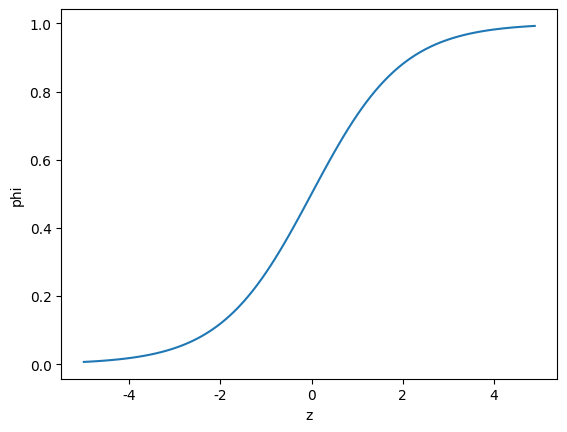

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

z = np.arange(-5, 5, 0.1)
phi = 1 / (1 + np.exp(-z))

plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

# 확인 학습 : 위스콘시 대학의 유방암 진단

- 병원 환장에 대한 정보와 유방암 진단 여부를 기록한 데이터셋

In [ ]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [ ]:
# dir(cancer)
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

- 569명의 환자 데이터셋
- 30개의 특성
- 357명의 정상(Benign) 환자, 212명의 유방암(Malignant) 환자

## 데이터 전처리

In [ ]:
train_input, test_input, train_target, test_target = train_test_split(
    cancer.data, cancer.target, test_size=0.3, stratify = cancer.target, random_state=42)

In [ ]:
df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
train_input[:5]

array([[1.162e+01, 1.818e+01, 7.638e+01, 4.088e+02, 1.175e-01, 1.483e-01,
        1.020e-01, 5.564e-02, 1.957e-01, 7.255e-02, 4.101e-01, 1.740e+00,
        3.027e+00, 2.785e+01, 1.459e-02, 3.206e-02, 4.961e-02, 1.841e-02,
        1.807e-02, 5.217e-03, 1.336e+01, 2.540e+01, 8.814e+01, 5.281e+02,
        1.780e-01, 2.878e-01, 3.186e-01, 1.416e-01, 2.660e-01, 9.270e-02],
       [1.120e+01, 2.937e+01, 7.067e+01, 3.860e+02, 7.449e-02, 3.558e-02,
        0.000e+00, 0.000e+00, 1.060e-01, 5.502e-02, 3.141e-01, 3.896e+00,
        2.041e+00, 2.281e+01, 7.594e-03, 8.878e-03, 0.000e+00, 0.000e+00,
        1.989e-02, 1.773e-03, 1.192e+01, 3.830e+01, 7.519e+01, 4.396e+02,
        9.267e-02, 5.494e-02, 0.000e+00, 0.000e+00, 1.566e-01, 5.905e-02],
       [1.057e+01, 1.832e+01, 6.682e+01, 3.409e+02, 8.142e-02, 4.462e-02,
        1.993e-02, 1.111e-02, 2.372e-01, 5.768e-02, 1.818e-01, 2.542e+00,
        1.277e+00, 1.312e+01, 1.072e-02, 1.331e-02, 1.993e-02, 1.111e-02,
        1.717e-02, 4.492e-03, 1.094e

## 정규화

In [ ]:
ss = StandardScaler()
train_scaled = ss.fit_transform(train_input)
test_scaled = ss.transform(test_input)

## 로지스틱 회귀 모델링

- 이진분류 문제 중 암에 걸렸는지 찾는 문제에서 진단이 암일 경우는 1, 암이 아닐경우는 0을 의미
- 분석을 통해 알아내려는 값을 1로 둔다

In [ ]:
model = LogisticRegression() # C=1
model.fit(train_scaled, train_target)

LogisticRegression()

In [ ]:
model.score(train_scaled, train_target)

0.9874371859296482

In [ ]:
model.score(test_scaled, test_target)

0.9883040935672515

In [ ]:
# test_scaled에 대한 p(y=0) 예측 확률값과 p(y=1) 예측 확률값
np.round(model.predict_proba(test_scaled), decimals = 3)

array([[0.968, 0.032],
       [0.05 , 0.95 ],
       [0.017, 0.983],
       [0.999, 0.001],
       [0.717, 0.283],
       [0.999, 0.001],
       [0.   , 1.   ],
       [0.998, 0.002],
       [0.018, 0.982],
       [1.   , 0.   ],
       [0.   , 1.   ],
       [0.008, 0.992],
       [0.997, 0.003],
       [0.131, 0.869],
       [0.001, 0.999],
       [0.713, 0.287],
       [1.   , 0.   ],
       [0.14 , 0.86 ],
       [0.001, 0.999],
       [0.014, 0.986],
       [0.008, 0.992],
       [0.108, 0.892],
       [0.022, 0.978],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [0.142, 0.858],
       [0.002, 0.998],
       [0.012, 0.988],
       [0.999, 0.001],
       [1.   , 0.   ],
       [0.118, 0.882],
       [1.   , 0.   ],
       [0.008, 0.992],
       [0.001, 0.999],
       [1.   , 0.   ],
       [0.   , 1.   ],
       [0.165, 0.835],
       [0.001, 0.999],
       [0.008, 0.992],
       [0.095, 0.905],
       [0.054, 0.946],
       [0.999, 0.001],
       [0.   , 1.   ],
       [0. 

- 위에서 도출된 결과의 첫번째 칼럼이 y = 0일 확률, 두번째 컬럼이 y = 1 유방암일 확률을 나타낸다.

In [ ]:
# 모델의 제약을 풀어주기 위한 규제 C를 증가해보자

model100 = LogisticRegression(C=100).fit(train_scaled, train_target)
print(model100.score(train_scaled, train_target))
print(model100.score(test_scaled, test_target))

0.9974874371859297
0.9532163742690059


In [ ]:
model001 = LogisticRegression(C=0.01).fit(train_scaled, train_target)
print(model001.score(train_scaled, train_target))
print(model001.score(test_scaled, test_target))

0.957286432160804
0.9415204678362573


In [ ]:
# z값 도출
decisions = model.decision_function(train_input[:5])
decisions

array([ -914.97759675,  -818.5732959 ,  -684.20446115, -1006.51444482,
        -797.92531079])

# 분류 평가지표를 통한 성능 평가

<img src="images/test.png" width="500px" height="300px"></img>

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, roc_curve, precision_recall_curve
# 예측
pred = model.predict(test_scaled)

cm = confusion_matrix(test_target, pred)
cm

array([[ 63,   1],
       [  1, 106]])

In [ ]:
# get(실제값, 예측값, 예측확률)
def get(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)

    print('오차 행렬(혼돈 행렬)')
    print(confusion)

    print(f'정확도:{accuracy:.4f}, 정밀도:{precision:.4f}, 재현율:{recall:.4f}, F1:{f1:.4f}, AUC:{roc_auc:.4f}')

In [ ]:
pred_proba_po = model.predict_proba(test_scaled)[:, 1].reshape(-1, 1)

In [ ]:
get(test_target, pred, pred_proba_po)

오차 행렬(혼돈 행렬)
[[ 63   1]
 [  1 106]]
정확도:0.9883, 정밀도:0.9907, 재현율:0.9907, F1:0.9907, AUC:0.9981


## 정확도(Accuracy)

- 전체 샘플 중 맞게 예측한 샘플 수의 비융
- accuracy_score(y_true, y_pred)


- 정확도(Accuracy) = $\frac{예측 결과가 동일한 데이터 건수}{전체 예측 데이터 건수}$

## 오차행렬(Confusion Matrix) or 혼돈 행렬

- 이진분류의 성능지표를 잘 활용된다.
- 이진분류의 예측 오류가 얼마인지 어떠한 유형의 예측 오류가 발생하고 있는지를 함께 나타낸다.
- Negative : 0, Positive : 1
- TN : 예측값과 실제값이 모두 Negative 0으로 예측
- FP : 예측은 Positive 1인데 실제값은 Negative 0
- FN : 예측은 Negative 0인데 실제값은 Positive 1
- TP : 예측과 실제값 모두 Positive 1로 예측
- confusion_matrix(y_true, y_pred)

## 정밀도(Precision)

- 예측과 실제값이 Positive로 일치하는 데이터의 비율
- 높을수록 좋은 모델이다.
- 불균형한 데이터셋을 다룰 때 유용한 지표
- precision_score(y_true, y_pred)


- 정밀도(Precision) = $\frac{TP}{TP + FP}$

## 재현율(Recall)

- 실제값이 Positive인 대상 중 예측과 실제값이 Positive로 일치한 데이터의 비율
- 민감도(Sensitivity) 또는 TPR(True Positive Rate)라고도 부름
- recall_score(y_true, y_pred)


- 재현율(Recall) = $\frac{TP}{TP + FN}$

In [ ]:
# 정밀도와 재현율 관계 시각화
def prc(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    plt.figure(figsize= (10, 10))
    boundary= thresholds.shape[0]
    plt.plot(thresholds, precisions[0:boundary], linestyle='--', label= 'precision')
    plt.plot(thresholds, recalls[0:boundary], label='recall')

    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlabel('threshold value') # 임계값
    plt.ylabel('precision and recall')
    plt.legend()
    plt.grid()
    plt.show()

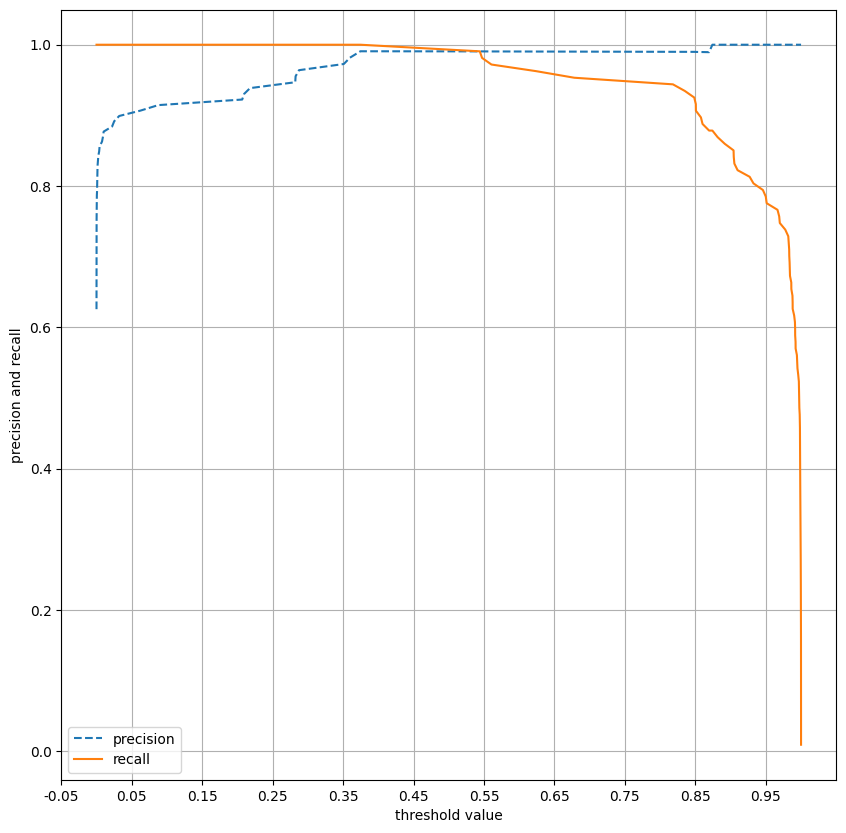

In [ ]:
prc(test_target, pred_proba_po)

- 최적의 임계값 0.55

In [ ]:
# 참고로 위에 코드 궁금하면
precisions, recalls, thresholds = precision_recall_curve(test_target, pred_proba_po)
print(thresholds)

[1.16149719e-22 6.77717307e-17 6.71522239e-13 6.63067584e-11
 3.54345220e-10 2.36350770e-09 1.09876494e-08 1.70488757e-08
 7.17524698e-08 1.75979461e-07 3.31978368e-07 9.26112285e-07
 9.50701382e-07 1.34195685e-06 1.74005149e-06 2.33528816e-06
 3.66505068e-06 9.01861987e-06 9.07106953e-06 1.10280607e-05
 1.21137686e-05 1.51341942e-05 3.61535905e-05 3.64753280e-05
 4.67463813e-05 6.02703723e-05 7.32926379e-05 7.98283284e-05
 9.21489830e-05 1.45476738e-04 1.99718105e-04 2.21296122e-04
 3.81550826e-04 3.84924518e-04 4.21596980e-04 4.94578639e-04
 7.61350352e-04 8.64070807e-04 8.84835576e-04 1.04663511e-03
 1.06381969e-03 1.37163217e-03 1.56014365e-03 2.08330615e-03
 2.54661818e-03 3.79879731e-03 4.38593319e-03 7.81465387e-03
 9.17655262e-03 1.01553098e-02 2.21759246e-02 2.50979182e-02
 3.22489701e-02 6.24757686e-02 8.76456808e-02 2.06763808e-01
 2.09577016e-01 2.17923771e-01 2.82081042e-01 2.82580610e-01
 2.87376041e-01 3.51017014e-01 3.59720396e-01 3.74570162e-01
 5.43994886e-01 5.472596

## 특이도(Specificity)

- 실제값 Negative를 Negative로 예측한 비율


- 특이도(Specificity)  = $\frac{TN}{FP + TN}$

## F1 스코어

- 정밀도와 재현율을 결합한 지표
- 정밀도와 재현율이 어느 한쪽으로 치우치지 않는 수치를 나타낼 때 상대적으로 높은 값을 가진다.
- f1_score(y_true, y_pred)


- F1 = $2 * \frac{precision * recall}{precision + recall}$

## ROC/AUC curve 곡선

- ROC 곡선은 FPR(False Positive Rate)이 변할 때 TPR(True Positive Rate)이 어떻게 변하는지를 나타내는 곡선(FPR을 x축, TPR=재현율을 y축)
- AUC(Area Under Curve) 값은 ROC 곡선 밑의 면적을 구한 것으로 일반적으로 1에 가까울수록 좋은 수치이다.

## 기타 평가 지표

- classfication_report(y_true, y_pred)

In [ ]:
pred_proba_po.shape # 암환자라고 예측한 값들

(171, 1)

In [ ]:
cut_off = [0.4, 0.45, 0.50, 0.55, 0.60]

for cut in cut_off:
    # 확률값이 cut값보다 크면 1(유방암), 0(유방암x)
    y_pred = np.where(pred_proba_po.reshape(-1) >= cut, 1, 0)
    acc = accuracy_score(test_target, y_pred)
    recall = recall_score(test_target, y_pred)
    precision = precision_score(test_target, y_pred)

    print(f"정확도:{acc:.2f},  재현율:{recall:.2f}, 정밀도:{precision:.2f}")


정확도:0.99,  재현율:0.99, 정밀도:0.99
정확도:0.99,  재현율:0.99, 정밀도:0.99
정확도:0.99,  재현율:0.99, 정밀도:0.99
정확도:0.98,  재현율:0.97, 정밀도:0.99
정확도:0.97,  재현율:0.96, 정밀도:0.99
